# Analizar la cotización del  dólar en Colombia.

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(filepath_or_buffer=r"/content/Tasa_de_Cambio_Representativa_del__Mercado_-Historico.csv", usecols=["VALOR", "VIGENCIADESDE"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7921 entries, 0 to 7920
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   VALOR          7921 non-null   object
 1   VIGENCIADESDE  7921 non-null   object
dtypes: object(2)
memory usage: 123.9+ KB


In [ ]:
df['VIGENCIADESDE'] = pd.to_datetime(df['VIGENCIADESDE'], dayfirst=True) # Convertimos VIGENCIADESDE a datetime64[ns]
df['VIGENCIADESDE_YEAR'] = df['VIGENCIADESDE'].dt.year # Creamos una nueva columna con el año
df['VALOR'] = df['VALOR'].str.replace(',', '').astype(float) # Convertimos la columna VALOR a float
df_filtered = df[df['VIGENCIADESDE_YEAR'] == 2024] # Filtramos solo las del año 2024

<Axes: >

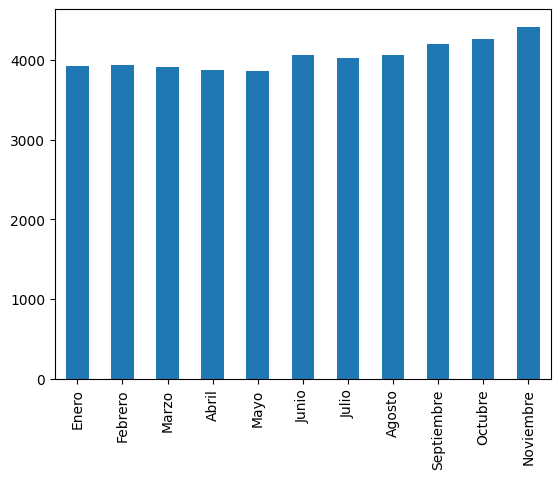

In [ ]:
group_month = df_filtered.groupby(df_filtered['VIGENCIADESDE'].dt.month)['VALOR'].mean() # Agrupamos por mes y calculamos la media de VALOR
group_month.index = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre'] # Cambiamos el nombre de los meses
group_month.plot(kind='bar') # Graficamos

# Análisis  des sobrevivientes  por sexo en el  naufragio del  Titanic.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
titanic = pd.read_csv(filepath_or_buffer=r"https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
sobrevivientes = titanic[titanic["Survived"] == 1]
sobrevivientes

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
sobrevivientes_genero = sobrevivientes.groupby("Sex")["Survived"].count()
sobrevivientes_genero_porcentaje = sobrevivientes_genero / sobrevivientes_genero.sum() * 100
sobrevivientes_genero_porcentaje

,Survived
Sex,
female,68.128655
male,31.871345


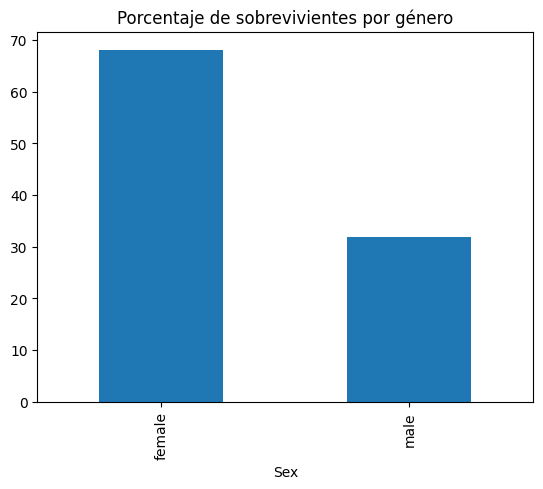

In [ ]:
sobrevivientes_genero_porcentaje.plot(kind="bar", title="Porcentaje de sobrevivientes por género")
plt.show()

# Determinar el  porcentaje  de personas  mayores de 40 años que sobrevivieron.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
titanic = pd.read_csv(filepath_or_buffer=r"https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
sobrevivientes_gt40 = titanic[(titanic["Survived"] == 1)]
group_sobrevivientes_gt40 = sobrevivientes_gt40.groupby([(titanic['Age'] > 40)])['Survived'].count()
group_sobrevivientes_gt40.index = ['Menores de 40', 'Mayores de 40']
group_sobrevivientes_gt40_porcentaje = group_sobrevivientes_gt40 / group_sobrevivientes_gt40.sum() * 100
group_sobrevivientes_gt40_porcentaje

,Survived
Menores de 40,83.918129
Mayores de 40,16.081871


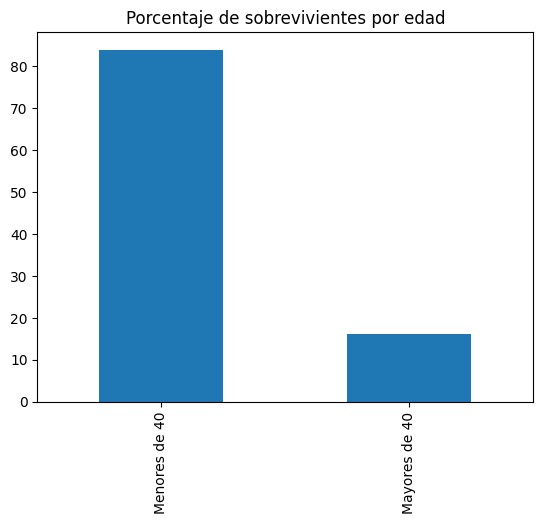

In [ ]:
group_sobrevivientes_gt40_porcentaje.plot(kind="bar", title="Porcentaje de sobrevivientes por edad")
plt.show()

# Determinar el  porcentaje  de sobrevivientes  por  clase  de boleto del pasajero

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
titanic = pd.read_csv(filepath_or_buffer=r"https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
sobrevivientes = titanic[titanic["Survived"] == 1]
sobrevivientes_ticket = sobrevivientes.groupby("Pclass")["Survived"].count()
sobrevivientes_ticket_porcentaje = sobrevivientes_ticket / sobrevivientes_ticket.sum() * 100
sobrevivientes_ticket_porcentaje

,Survived
Pclass,
1,39.766082
2,25.438596
3,34.795322


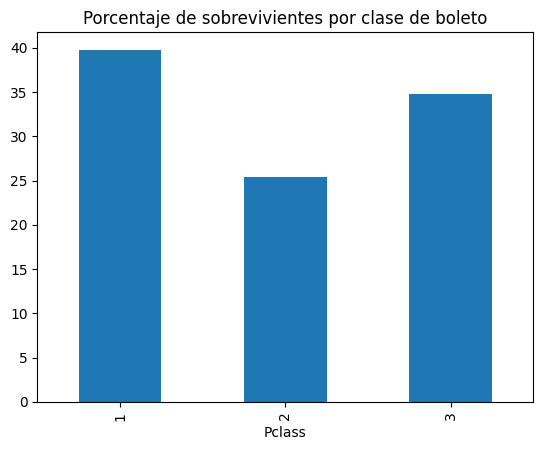

In [ ]:
sobrevivientes_ticket_porcentaje.plot(kind="bar", title="Porcentaje de sobrevivientes por clase de boleto")
plt.show()

# Determinar la cantidad, la media   y la  desviación estándar   de la edad de los  pasajeros  hombres  y mujeres que  murieron en el naufragio.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
titanic = pd.read_csv(filepath_or_buffer=r"https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
titanic

In [ ]:
no_sobrevivientes = titanic[titanic["Survived"] == 0]
no_sobrevivientes_edad_media = no_sobrevivientes.groupby("Sex")["Age"].agg(["count", "mean", "std"])
no_sobrevivientes_edad_media

,count,mean,std
Sex,,,
female,64,25.046875,13.618591
male,360,31.618056,14.056019


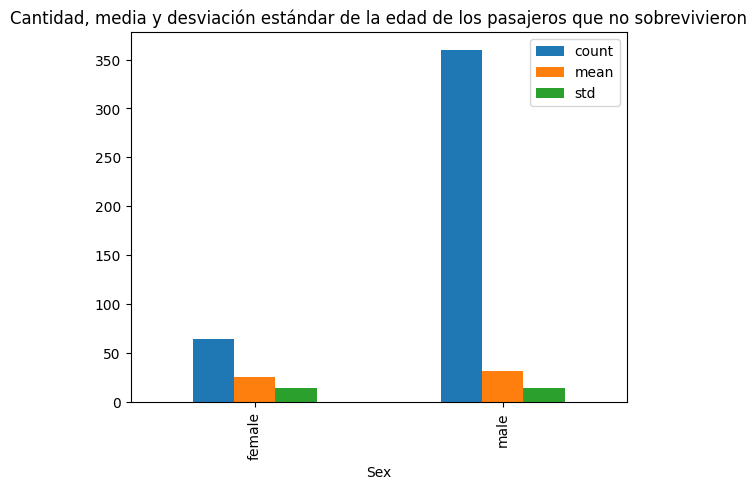

In [ ]:
no_sobrevivientes_edad_media.plot(kind="bar", title="Cantidad, media y desviación estándar de la edad de los pasajeros que no sobrevivieron")
plt.show()